In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
# Load datasets
employments = pd.read_csv('Dataset/employment.csv', skiprows=10)
GDP = pd.read_csv('Dataset/gross domestic product (gdp) state  north carolina (dollars).csv')
crime = pd.read_csv('Dataset/north-carolina-crime-rate-2024-11-08.csv', skiprows=15)
crime['date'] = pd.to_datetime(crime['date'])
crime['date'] = crime['date'].dt.year
crime.drop(crime.columns[3], axis=1, inplace=True)
print(crime.head())

   date        NC        US
0  1979  446.1113  548.8576
1  1980  455.0055  596.6383
2  1981  436.6661  593.4743
3  1982  446.3366  570.8213
4  1983  409.5857  538.1224


In [60]:
print(GDP.head())


   Years  North Carolina
0   2022    7.300000e+11
1   2021    6.620000e+11
2   2020    5.990000e+11
3   2019    5.950000e+11
4   2018    5.680000e+11


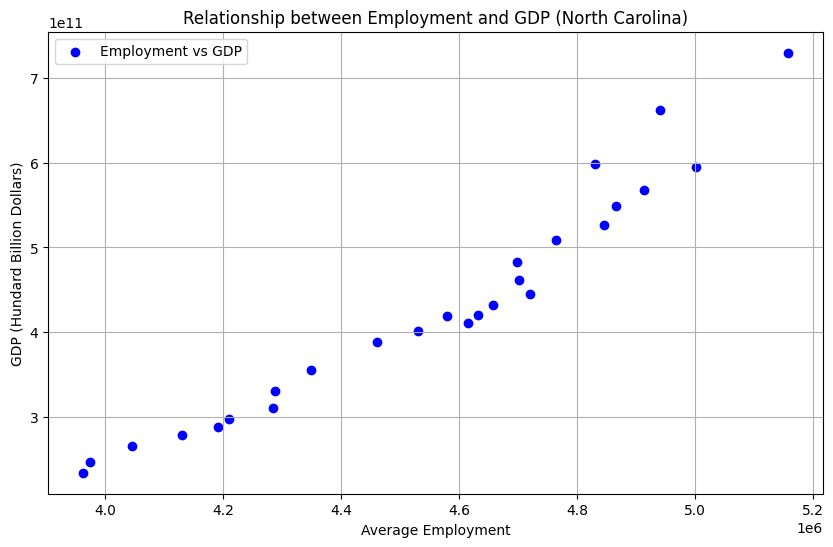

In [61]:
# Calculate the average employment for each year
employments['Average Employment'] = employments.iloc[:, 1:13].mean(axis=1)

# Extract only relevant columns
employment_data = employments[['Year', 'Average Employment']]
GDP_data = GDP.rename(columns={"Years": "Year"})

# Merge datasets on 'Year'
merged_data = pd.merge(employment_data, GDP_data, on='Year', how='inner')

# Plotting the relation between employment and GDP
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Average Employment'], merged_data['North Carolina'], color='blue', label='Employment vs GDP')
plt.title("Relationship between Employment and GDP (North Carolina)")
plt.xlabel("Average Employment")
plt.ylabel("GDP (Hundard Billion Dollars)")
plt.grid(True)
plt.legend()
plt.show()


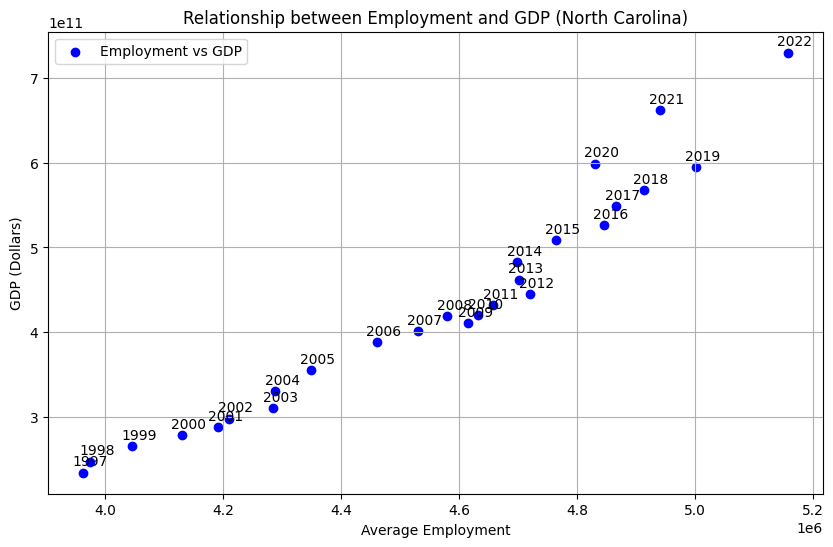

In [62]:
# Plotting the relation between employment and GDP
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Average Employment'], merged_data['North Carolina'], color='blue', label='Employment vs GDP')

# Annotating each point with the corresponding year
for i in range(len(merged_data)):
    plt.annotate(
        merged_data['Year'].iloc[i], 
        (merged_data['Average Employment'].iloc[i], merged_data['North Carolina'].iloc[i]),
        textcoords="offset points",  # Positioning the text
        xytext=(5, 5),  # Offset from the point
        ha='center'  # Horizontal alignment
    )

# Adding titles and labels
plt.title("Relationship between Employment and GDP (North Carolina)")
plt.xlabel("Average Employment")
plt.ylabel("GDP (Dollars)")
plt.grid(True)
plt.legend()
plt.show()


/Users/wangpeng/miniforge3/envs/tableau/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


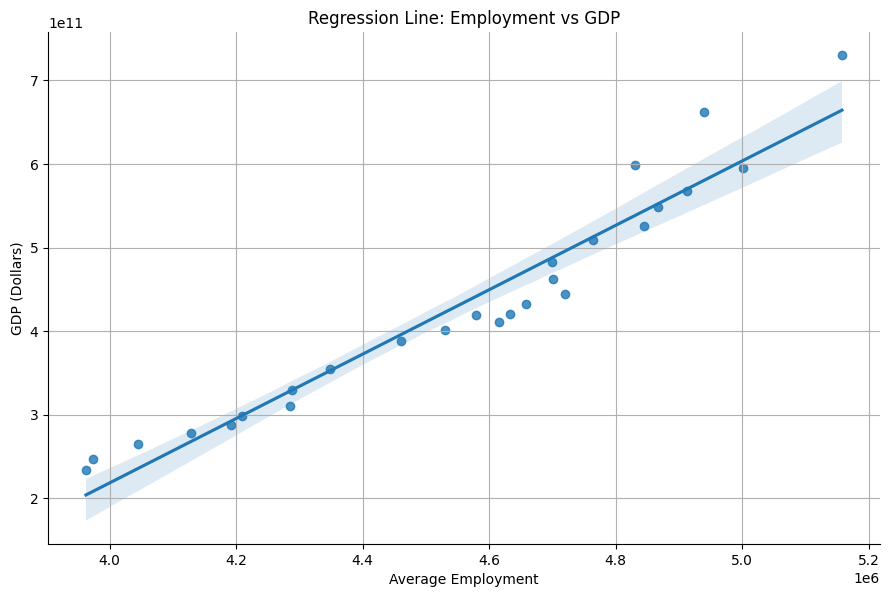

In [63]:
sns.lmplot(x='Average Employment', y='North Carolina', data=merged_data, height=6, aspect=1.5)
plt.title('Regression Line: Employment vs GDP')
plt.xlabel('Average Employment')
plt.ylabel('GDP (Dollars)')
plt.grid(True)
plt.show()
